# Billboard EDA V

This is where I'll try to calculate weeks per song per year, and potentially look at some other "lifespan" related questions

In [1]:
# Packages & Settings


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [3]:
# converting WeekID to datetime
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [4]:
# renaming columns to python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [5]:
#creating date/month/day/year columns


billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [6]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [7]:
# replacing artist names
# at some point I gotta figure out how to deal with "Janet Jackson" vs "Janet"

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 

In [8]:
# Creating "chart-points" variable (formerly known as "week-points") 
# note: I'm going to keep these as floats: I don't think I need them as floats for anything,
# but if this is all eventually going into one notebook, then I don't see the harm
billboard_df['chart_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1).astype(float)
billboard_df['weeks_on_chart'] = billboard_df['weeks_on_chart'].astype(float)

In [9]:
performer_min_year_groupby = billboard_df.groupby(['performer']).year.min().reset_index()

In [10]:
performer_min_year_groupby.head(200)

,performer,year
0,"""Groove"" Holmes",1966
1,"""Little"" Jimmy Dickens",1965
2,"""Pookie"" Hudson",1963
3,"""Weird Al"" Yankovic",1983
4,'N Sync,1998
5,'N Sync & Gloria Estefan,1999
6,'N Sync Featuring Nelly,2002
7,'Til Tuesday,1985
8,(+44),2006
9,(The Preacher) Bobby Womack,1972


In [11]:
performer_unique_years_groupby = billboard_df.groupby(['performer']).year.nunique().reset_index()

In [12]:
performer_unique_years_groupby = performer_unique_years_groupby.rename(columns={"year": "unique_years"})
performer_unique_years_groupby.head(200)


,performer,unique_years
0,"""Groove"" Holmes",1
1,"""Little"" Jimmy Dickens",1
2,"""Pookie"" Hudson",1
3,"""Weird Al"" Yankovic",9
4,'N Sync,5
5,'N Sync & Gloria Estefan,2
6,'N Sync Featuring Nelly,1
7,'Til Tuesday,4
8,(+44),1
9,(The Preacher) Bobby Womack,1


In [13]:
#new_df = performer_min_year_groupby.join(performer_unique_years_groupby)
new_df = performer_min_year_groupby.set_index('performer').join(performer_unique_years_groupby.set_index('performer'))

In [14]:
new_df.head(200)

,year,unique_years
performer,,
"""Groove"" Holmes",1966,1
"""Little"" Jimmy Dickens",1965,1
"""Pookie"" Hudson",1963,1
"""Weird Al"" Yankovic",1983,9
'N Sync,1998,5
'N Sync & Gloria Estefan,1999,2
'N Sync Featuring Nelly,2002,1
'Til Tuesday,1985,4
(+44),2006,1


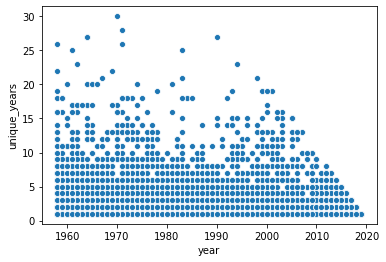

In [15]:
ax = sns.scatterplot(x="year", y = "unique_years", data=new_df)

In [16]:
new_groupby = new_df.groupby(['year']).unique_years.mean().reset_index()

In [17]:
new_groupby.head(200)

,year,unique_years
0,1958,3.831818
1,1959,2.253394
2,1960,2.452514
3,1961,2.467532
4,1962,2.818182
5,1963,2.254144
6,1964,2.820809
7,1965,2.818182
8,1966,2.126984
9,1967,2.248555


In [37]:
yearly_median_groupby =  new_df.groupby(['year']).unique_years.median().reset_index()

In [40]:
yearly_median_groupby.tail(30)

,year,unique_years
32,1990,1
33,1991,1
34,1992,2
35,1993,2
36,1994,2
37,1995,2
38,1996,1
39,1997,1
40,1998,1
41,1999,2


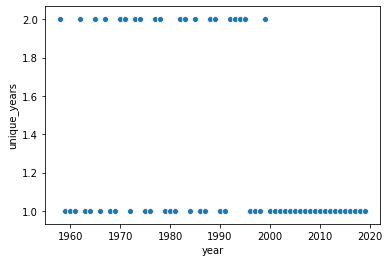

In [38]:
ax = sns.scatterplot(x="year", y = "unique_years", data=yearly_median_groupby)

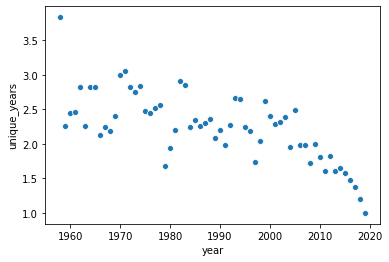

In [18]:
ax = sns.scatterplot(x="year", y = "unique_years", data=new_groupby)

# Ok, we would expect recent years to have lower values. I'm gonna do this again with Week ID

In [19]:
performer_unique_week_id_groupby = billboard_df.groupby(['performer']).week_id.nunique().reset_index()

In [20]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,chart_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1.0,1990-02-10,2,10,1990,26.0
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2.0,1990-02-17,2,17,1990,48.0
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3.0,1990-02-24,2,24,1990,58.0
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4.0,1990-03-03,3,3,1990,64.0
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5.0,1990-03-10,3,10,1990,74.0


In [21]:
also_a_new_df = performer_min_year_groupby.set_index('performer').join(performer_unique_week_id_groupby.set_index('performer'))

In [22]:
also_a_new_df.head(200)

,year,week_id
performer,,
"""Groove"" Holmes",1966,14
"""Little"" Jimmy Dickens",1965,10
"""Pookie"" Hudson",1963,1
"""Weird Al"" Yankovic",1983,84
'N Sync,1998,156
'N Sync & Gloria Estefan,1999,20
'N Sync Featuring Nelly,2002,20
'Til Tuesday,1985,51
(+44),2006,1


In [23]:
also_a_new_groupby = also_a_new_df.groupby(['year']).week_id.mean().reset_index()

In [24]:
median_groupby = also_a_new_df.groupby(['year']).week_id.median().reset_index()

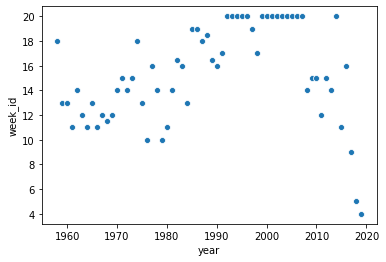

In [36]:
ax = sns.scatterplot(x="year", y = "week_id", data=median_groupby)

In [25]:
also_a_new_groupby.head(200)

,year,week_id
0,1958,54.518182
1,1959,29.615385
2,1960,29.832402
3,1961,30.857143
4,1962,35.903743
5,1963,25.801105
6,1964,39.913295
7,1965,35.707792
8,1966,26.174603
9,1967,26.884393


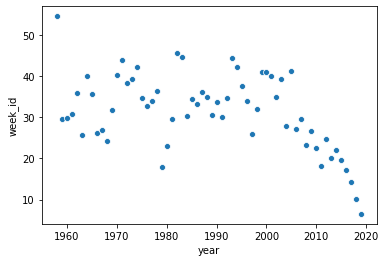

In [26]:
ax = sns.scatterplot(x="year", y = "week_id", data=also_a_new_groupby)

In [41]:
# one more round with maximums 
max_yearly_groupby = new_df.groupby(['year']).unique_years.max().reset_index()

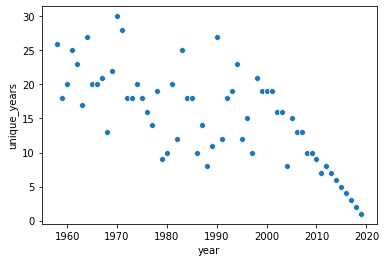

In [42]:
ax = sns.scatterplot(x="year", y = "unique_years", data=max_yearly_groupby)

In [43]:
max_weekly_groupby = also_a_new_df.groupby(['year']).week_id.max().reset_index()

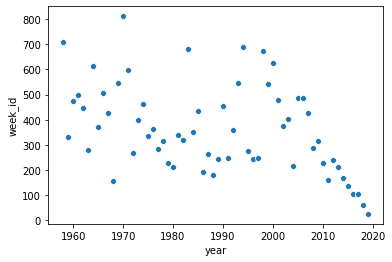

In [44]:
ax = sns.scatterplot(x="year", y = "week_id", data=max_weekly_groupby)

In [27]:
also_a_new_groupby.week_id.describe()

count    62.000000
mean     31.543077
std       9.172184
min       6.528302
25%      26.038934
50%      32.253649
75%      38.229766
max      54.518182
Name: week_id, dtype: float64

In [28]:
new_groupby.unique_years.describe()

count    62.000000
mean      2.250424
std       0.493783
min       1.000000
25%       1.976267
50%       2.254430
75%       2.506776
max       3.831818
Name: unique_years, dtype: float64

In [29]:


X = new_groupby["year"] ## X usually means our input variables (or independent variables)
y = new_groupby["unique_years"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           unique_years   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     60.96
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.04e-10
Time:                        17:48:56   Log-Likelihood:                -21.986
No. Observations:                  62   AIC:                             47.97
Df Residuals:                      60   BIC:                             52.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.8854      4.949      8.262      0.000      30.987      50.784
year          -0.0194      0.002     -7.807      0.000      -0.024      -0.014
==============================================================================
Omnibus:                        0.505   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.777   Jarque-Bera (JB):                0.345
Skew:                           0.182   Prob(JB):                        0.842
Kurtosis:                       2.961   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:


X = also_a_new_groupby["year"] ## X usually means our input variables (or independent variables)
y = also_a_new_groupby["week_id"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                week_id   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     17.37
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           0.000100
Time:                        17:48:56   Log-Likelihood:                -216.99
No. Observations:                  62   AIC:                             438.0
Df Residuals:                      60   BIC:                             442.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        510.5346    114.936      4.442      0.000     280.628     740.441
year          -0.2409      0.058     -4.168      0.000      -0.356      -0.125
==============================================================================
Omnibus:                        1.183   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                0.988
Skew:                          -0.017   Prob(JB):                        0.610
Kurtosis:                       2.382   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# I'm not entirely sure what these results mean. I'm gonna try it again with 

In [31]:
# note: taylor recommends set operations: 
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,chart_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1.0,1990-02-10,2,10,1990,26.0
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2.0,1990-02-17,2,17,1990,48.0
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3.0,1990-02-24,2,24,1990,58.0
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4.0,1990-03-03,3,3,1990,64.0
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5.0,1990-03-10,3,10,1990,74.0


In [32]:
the_other_groupby = billboard_df.groupby('week_id').song_id.unique().reset_index()


In [33]:
the_other_groupby.head(200)

,week_id,song_id
0,1958-08-02,"[Poor Little FoolRicky Nelson, PatriciaPerez P..."
1,1958-08-09,"[Susie Darlin'Robin Luke, Devoted To YouThe Ev..."
2,1958-08-16,"[How The Time FliesJerry Wallace, Down In Virg..."
3,1958-08-23,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo..."
4,1958-08-30,[Nel Blu Dipinto Di Blu (Volaré)Domenico Modug...
5,1958-09-06,"[La PalomaBilly Vaughn And His Orchestra, No O..."
6,1958-09-13,[Ten Commandments Of LoveHarvey & The Moonglow...
7,1958-09-20,"[Born Too LatePoni-Tails, Summertime BluesEddi..."
8,1958-09-27,"[Devoted To YouThe Everly Brothers, No One But..."
9,1958-10-04,[Leave Me Alone (Let Me Cry)Dicky Doo And The ...


In [34]:
the_other_groupby.dtypes

week_id    datetime64[ns]
song_id            object
dtype: object

In [35]:
# Idea: convert strings to sets and construct for-loop